# 数据结构与算法(五)之动态规划与回溯

## 基本框架和思路

动态规划最常见的问题是穷举求最值，并且一般存在重叠子问题，可进一步优化，用空间换时间。

- 基本思路
    - 确定状态（变量）和状态可做的选择
    - 确定dp的含义(可用数学归纳法推理)
    - 确定状态转移方程式
    
 回溯法
 
 - 基本思路
 ```
 def back(选择列表，路径）:
       if 边界条件:
          return 
          for choice in choices:
              做选择
              back()
              撤销选择
 ```
    
动态规划和回溯法的区别：

- 回溯：暴力遍历所有可能
- 动态规划：可以用dp("备忘录")来消除重叠子问题，进行时间上的优化

## 经典问题

### 零钱问题

#### [零钱问题I](https://leetcode-cn.com/problems/coin-change)

给你一个整数数组 coins ，表示不同面额的硬币；以及一个整数 amount ，表示总金额。

计算并返回可以凑成总金额所需的 最少的硬币个数 。如果没有任何一种硬币组合能组成总金额，返回 -1 。

你可以认为每种硬币的数量是无限的。

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float("inf")]*(amount+1)
        dp[0] = 0
        for i in range(1,amount+1):
            for coin in coins:
                if i-coin >= 0 and dp[i-coin] >= 0:
                    dp[i] = min(dp[i],1+dp[i-coin])
            if dp[i] == float("inf"):
                dp[i] = -1
        return dp[amount]

#### [零钱问题II](https://leetcode-cn.com/problems/coin-change-2)

给你一个整数数组 coins 表示不同面额的硬币，另给一个整数 amount 表示总金额。

请你计算并返回可以凑成总金额的硬币组合数。如果任何硬币组合都无法凑出总金额，返回 0 。

假设每一种面额的硬币有无限个。 

题目数据保证结果符合 32 位带符号整数。

In [ ]:
# 本题的关键是初始dp[0]=1，即金额为0，什么硬币都不取也为一种可能
# 此外，因为硬币组合不考虑顺序的问题，因此 1，2和2，1是同一种情况，如果用排列组合（类似爬楼梯）的方式，最终得到的数目会大
# 因为这是个组合问题，我们不关心硬币使用的顺序，而是硬币有没有被用到。

#正确的 子问题 定义应该是，problem(k,i) = problem(k-1, i) + problem(k, i-k)
# 说的更加直白一点，那就是用前 k 的硬币凑齐金额 i ，要分为两种情况开率，一种是没有用前 k-1 个硬币就凑齐了，一种是前面已经凑到了 i-k ，现在就差第 k 个硬币了。

class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        c = len(coins)+1
        dp = [[0]*(amount+1) for _ in range(c)] # 前k个硬币组成金额为i的组合数
        for k in range(c):
            dp[k][0] = 1
        for k in range(1,c):
            for i in range(1,amount+1):
                if i-coins[k-1] >= 0 :
                    dp[k][i] = dp[k-1][i] + dp[k][i-coins[k-1]]
                else:
                    dp[k][i] = dp[k-1][i]
        return dp[c-1][amount]

### 爬楼梯

In [1]:
class Solution:
    def climbStairs(self, n: int) -> int:
        dp = [0]*(n+1)
        dp[0] = 1
        dp[1] = 1
        for i in range(2,n+1):
            dp[i] = dp[i-1] + dp[i-2] 
        return dp[n]

### 打家劫舍

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        def rob2(nums):
            if len(nums) == 0:
                return 0
            if len(nums) <= 2:
                return max(nums)
            dp = [i for i in nums]
            dp[1] = max(dp[0],dp[1])
            for i in range(2,len(nums)):
                dp[i] = max(dp[i-2]+nums[i],dp[i-1])
            return dp[len(nums)-1]
        if len(nums) == 0:
            return 0
        if len(nums) <= 3:
            return max(nums)
        return max(rob2(nums[1:]),rob2(nums[:len(nums)-1]))

### 买卖股票

#### [买卖股票的最佳时机](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock/)

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        # 用一个变量记录历史最低价格即可
        max_profit = float("-inf")
        min_price = float("inf")
        for i in range(len(prices)):
            if i == 0:
                min_price = prices[i]
                continue
            if prices[i]-min_price>max_profit:
                max_profit = prices[i]-min_price
            min_price = min(min_price,prices[i])
        if max_profit < 0:
            return 0
        else:
            return max_profit

#### [买卖股票的最佳时机 II](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-ii/)

给定一个数组 prices ，其中 prices[i] 是一支给定股票第 i 天的价格。

设计一个算法来计算你所能获取的最大利润。你可以尽可能地完成更多的交易（多次买卖一支股票）。

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        # 贪心
        if len(prices)<=1:
            return 0
        ans = 0
        for i in range(1,len(prices)):
            ans += max(0,prices[i]-prices[i-1])
        return ans

#### [买卖股票的最佳时机 III](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-iii/)

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        if len(prices)<=1:
            return 0
        # 最大利润
        buy1 = -prices[0]
        buy2 = -prices[0]
        sell1 = sell2 = 0
        for i in range(1,len(prices)):
            buy1 = max(buy1,-prices[i]) # 可以什么都不做，也可以进行一次买操作
            sell1 = max(sell1,buy1+prices[i])
            buy2 = max(buy2,sell1-prices[i]) # 可以什么都不做，也可以在进行一次交易后，再进行一次买操作
            sell2 = max(sell2,buy2+prices[i])
        return sell2

#### [买卖股票的最佳时机含手续费](https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock-with-transaction-fee/)

In [ ]:
# 动态规划


### [目标和](https://leetcode-cn.com/problems/target-sum/)

#### 动态规划

In [ ]:
# 与零钱2问题不同,硬币可以有多个,但目标和数只能取一次
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        if (sum(nums)+target)%2 != 0:
            return 0
        s = (sum(nums)+target)//2
        n = len(nums)
        dp = [[0]*(s+1) for _ in range(n+1)]
        dp[0][0] = 1
        for i in range(1,n+1):
            for j in range(0,s+1):
                if j-nums[i-1] >= 0:
                    dp[i][j] = dp[i-1][j] + dp[i-1][j-nums[i-1]]
                else:
                    dp[i][j] = dp[i-1][j]
        return dp[n][s]

In [ ]:
# 改进为一维
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        if (sum(nums)+target)%2 != 0:
            return 0
        s = (sum(nums)+target)//2
        n = len(nums)
        dp = [0]*(s+1)
        dp[0] = 1
        for num in nums:
            for j in range(s,-1,-1):
                if j-num >= 0:
                    dp[j] = dp[j] + dp[j-num] # 每次保存前一行的值即可
        return dp[s]

#### 回溯法

In [ ]:
# 回溯法: 超时了
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        self.count = 0
        def backtrack(nums,target,start): # 在参数中增加i，不在往nums[i]之前遍历
            if start == len(nums):
                if target == 0:
                    self.count += 1
                return 
        
            backtrack(nums,target-nums[start],start+1)
            backtrack(nums,target+nums[start],start+1)
        backtrack(nums,target,0)
        return self.count

- 同类型问题:背包问题

### 背包问题

In [ ]:
# 问是否有物品组合,刚好装满背包
class Solution:
    def bag(self,nums,target):
        dp = [[False]*(target+1) for _ in range(len(nums)+1)]
        dp[0][0] = True
        for i in range(1,len(nums)+1):
            for j in range(target+1):
                if j-nums[i-1] >= 0:
                    dp[i][j] = dp[i-1][j] || dp[i-1][j-nums[i-1]]
                else:
                    dp[i][j] = dp[i-1][j]
        return dp[len(nums)][target]

> 百度笔试题

给定n个物品，每个物品有一个重量和价值，每个物品至多可以拿两次，背包可以承受的最大重量是W，问最多可以拿多少价值的物品

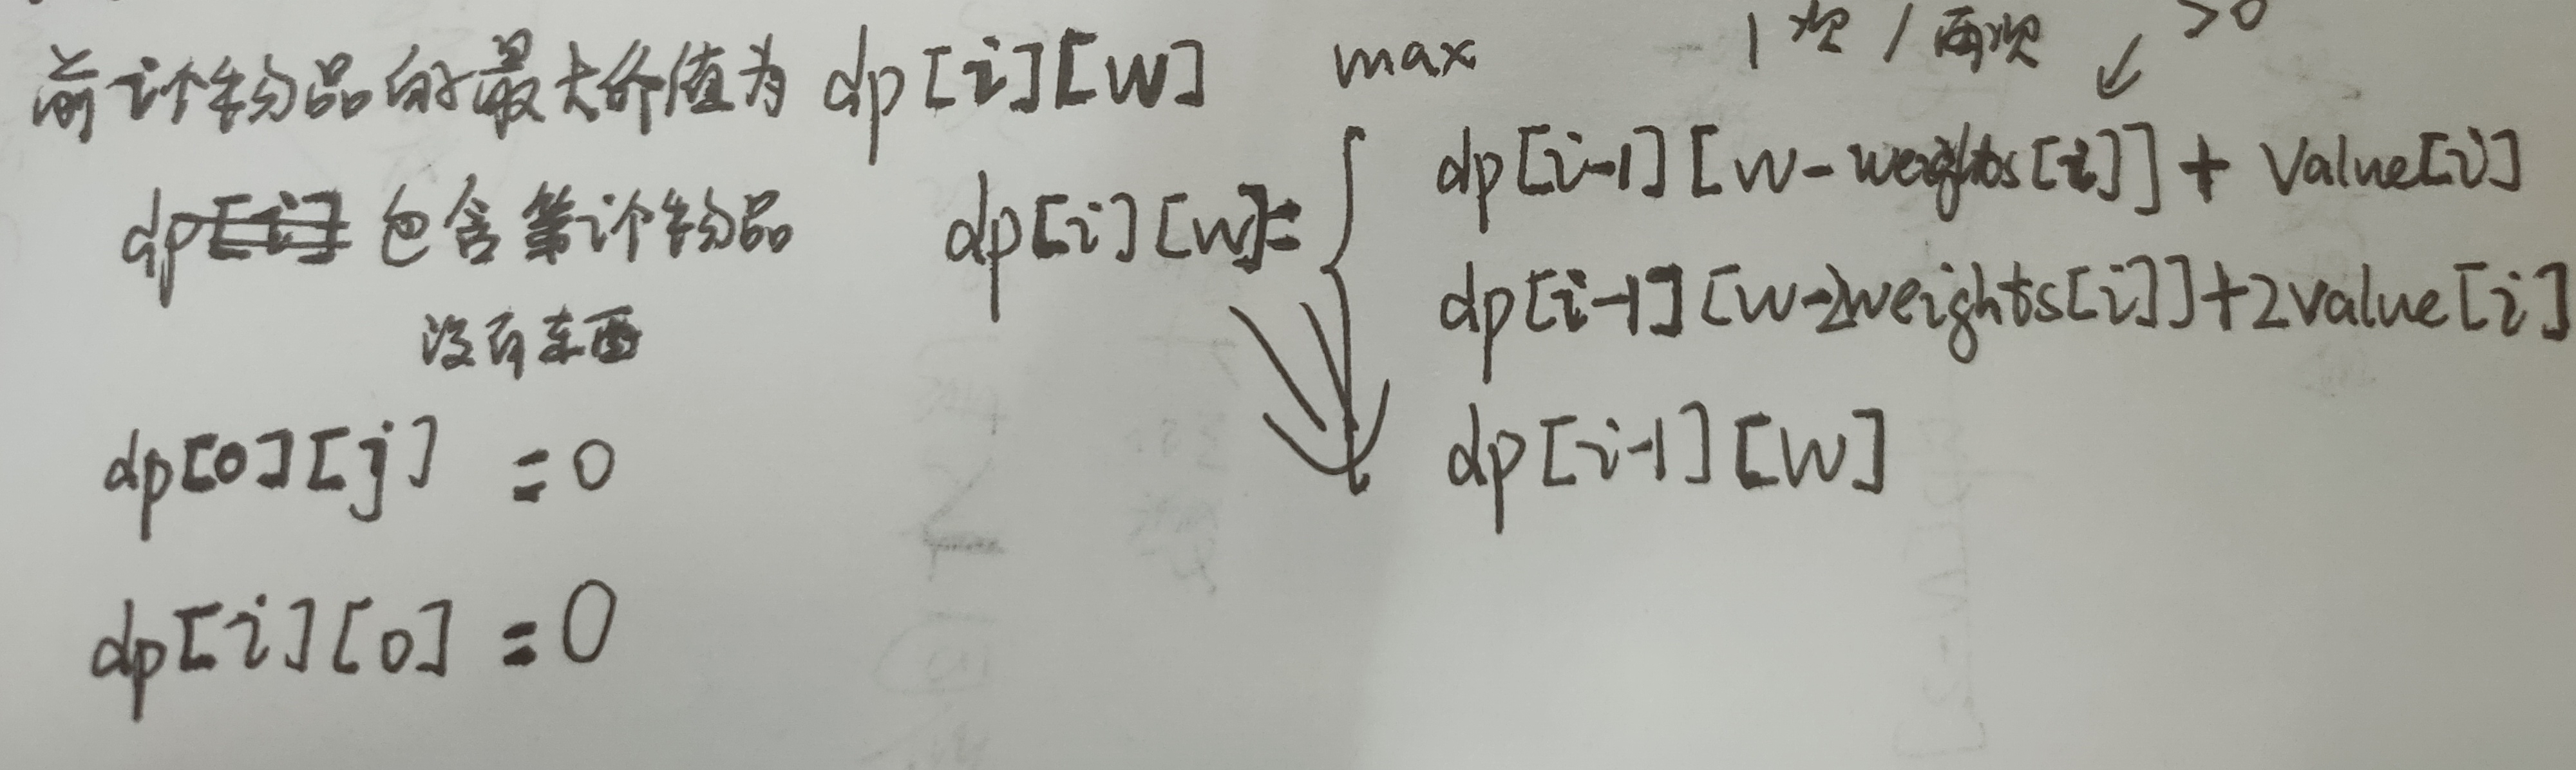

### 全排列 

In [ ]:
# 全排列1
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        self.result = []
        def backtrack(nums,select):
            if len(select) == len(nums):
                temp = []
                for s in select:
                    temp.append(nums[s])
                self.result.append(temp)
                return
            for i in range(len(nums)):
                if i in select:
                    continue
                select.append(i)
                backtrack(nums,select)
                select.pop(-1)
        backtrack(nums,[])
        return self.result

In [ ]:
# 全排列2
if (select[i]) or (i > 0 and nums[i] == nums[i-1] and not select[i-1]):
                    continue

### 跟序列有关的动态规划问题 

dp的含义一般均为:以第i个位置结尾的xxx

#### [最长递增子序列](https://leetcode-cn.com/problems/longest-increasing-subsequence/) 

In [3]:
class Solution:
    def lengthOfLIS(self, nums) -> int:
        # dp[i]:以i结尾的最长递增子序列长度
        dp = [1]*len(nums)
        for i in range(1,len(nums)):
            for j in range(i):
                if nums[j] < nums[i]:
                    dp[i] = max(dp[i],dp[j]+1)
        return max(dp)

#### [最长公共子序列](https://leetcode-cn.com/problems/longest-common-subsequence/)

In [4]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        m = len(text1)
        n = len(text2)
        dp = [[0]*n for _ in range(m)]
        for i in range(m):
            if text1[i] == text2[0]:
                dp[i][0] = 1
            else:
                dp[i][0] = dp[i-1][0]
        for j in range(n):
            if text1[0] == text2[j]:
                dp[0][j] = 1
            else:
                dp[0][j] = dp[0][j-1] # 0位置没考虑
        for i in range(1,m):
            for j in range(1,n):
                if text1[i] == text2[j]:
                    dp[i][j] = dp[i-1][j-1] + 1
                else:
                    dp[i][j] = max(dp[i-1][j],dp[i][j-1])
        return dp[m-1][n-1]

#### [编辑距离](https://leetcode-cn.com/problems/edit-distance/)

In [ ]:
# dp从0开始更方便,长度加一
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        m = len(word1)
        n = len(word2)
        dp = [[0]*(n+1) for _ in range(m+1)]
        for i in range(1,m+1):
            dp[i][0] = i
        for j in range(1,n+1):
            dp[0][j] = j
        for i in range(1,m+1):
            for j in range(1,n+1):
                if word1[i-1] == word2[j-1]:
                    dp[i][j] = dp[i-1][j-1]
                else:
                    dp[i][j] = min(dp[i-1][j-1],dp[i-1][j],dp[i][j-1]) + 1
        return dp[m][n]

#### [最长回文子字串](https://leetcode-cn.com/problems/longest-palindromic-substring/submissions/) 

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        longest = ""
        for i in range(len(s)):
            left = right = i
            while right+1 < len(s) and s[left] == s[right+1]:
                right = right + 1 
            while left-1 >= 0 and right+1 < len(s) and s[left-1] == s[right+1]:
                left -= 1
                right += 1
            if right-left+1 > len(longest):
                longest = s[left:right+1]
        return longest

#### [最长回文子序列](https://leetcode-cn.com/problems/longest-palindromic-subsequence/)

In [ ]:
# dp的求解比较特殊

## dfs与bfs 

### dfs

In [1]:
# 五子棋

####  [岛屿数量](https://leetcode-cn.com/problems/number-of-islands/solution/dao-yu-shu-liang-by-leetcode/)

In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        # write code here
        def dfs(grid,r,c):
            grid[r][c] = "0"
            m = len(grid)
            n = len(grid[0])
            for x,y in [[r,c-1],[r,c+1],[r-1,c],[r+1,c]]:
                if x>=0 and x < m and y >= 0 and y < n and grid[x][y] == "1":
                    dfs(grid,x,y)
        nums = 0
        rows = len(grid)
        columns = len(grid[0])
        if rows == 0 or columns == 0:
            return nums
        for i in range(rows):
            for j in range(columns):
                if grid[i][j] == "1":
                    nums += 1
                    # 深度遍历的次数就是岛的个数
                    dfs(grid,i,j)
        return nums

#### [路径之和](https://leetcode-cn.com/problems/path-sum/)

给你二叉树的根节点 root 和一个表示目标和的整数 targetSum ，判断该树中是否存在 根节点到叶子节点 的路径，这条路径上所有节点值相加等于目标和 targetSum 。

叶子节点 是指没有子节点的节点。

In [ ]:
def dfs(root,target):
    if not root:
        return False
    if not root.left and not root.right:
        return root.value==target
    l = dfs(root.left,target-root.value)
    r = dfs(root.right,target-root.value)
    return l or r

### bfs

#### [二进制矩阵中的最短路径](https://leetcode-cn.com/problems/shortest-path-in-binary-matrix/)

In [ ]:
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        if grid[0][0] == 1 or grid[-1][-1] == 1:  # top-left is not empty or bottom-right is not empty
            return -1

        # eight directions: → ← ↓ ↑ ↗ ↙ ↖ ↘
        directions = [[1, 0], [-1, 0], [0, -1], [0, 1], [1, 1], [1, -1], [-1, 1], [-1, -1]]
        
        queue = [(0, 0, 1)]  # location, cnt
        n = len(grid)

        # BFS
        while len(queue):
            x0, y0, cnt = queue.pop(0)  # pop (location, cnt)
            if x0 == n - 1 and y0 == n - 1:  # already arrive at bottom-right
                return cnt

            # eight directions
            for i, j in directions:
                x, y = x0 + i, y0 + j
                # (x, y) is in the grid and grid[x][y] = 0, also means: grid[x][y] is not visited
                if 0 <= x < n and 0 <= y < n and not grid[x][y]:
                    queue.append((x, y, cnt + 1))
                    grid[x][y] = 1  # visited
        
        return -1